In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset Preview")
df.head()

Dataset Preview


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


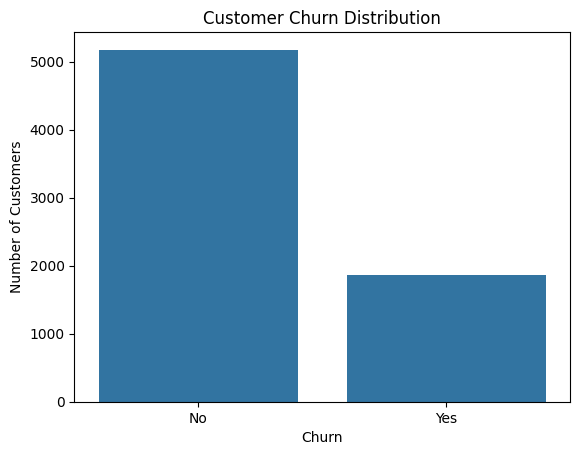

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn',data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
X=df.drop("Churn",axis=1)
y=df["Churn"]

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns  # find categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("Recall : ", recall)
print("F1 Score : ", f1)

Accuracy :  0.7615330021291696
Precision :  0.7605633802816901
Recall :  0.1447721179624665
F1 Score :  0.24324324324324326


In [ ]:
print("Classification Report : ")
print(classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

          No       0.76      0.98      0.86      1036
         Yes       0.76      0.14      0.24       373

    accuracy                           0.76      1409
   macro avg       0.76      0.56      0.55      1409
weighted avg       0.76      0.76      0.70      1409



In [ ]:
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix : 
[[1019   17]
 [ 319   54]]


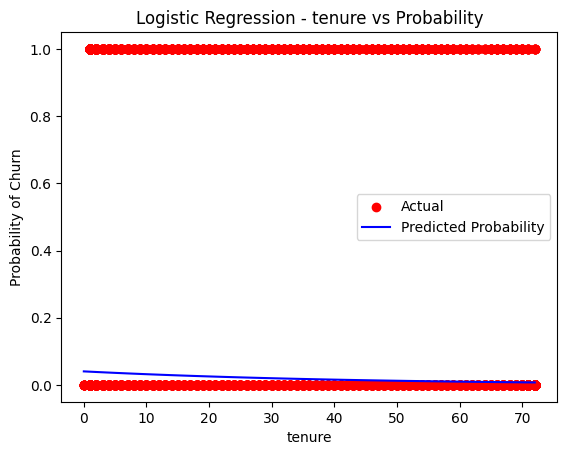

In [ ]:
import numpy as np
feature_name = 'tenure'
feature_index = X_encoded.columns.get_loc(feature_name)
X_feature_range = np.linspace(X[feature_name].min(), X[feature_name].max(), 100).reshape(-1,1)
X_mean = np.mean(X_encoded, axis=0).to_numpy().reshape(1, -1)
X_plot = np.repeat(X_mean, 100, axis=0)
X_plot[:, feature_index] = X_feature_range[:, 0]

X_plot_df = pd.DataFrame(X_plot, columns=X_encoded.columns)
X_plot_scaled = scaler.transform(X_plot_df)

y_prob_feature = logreg.predict_proba(X_plot_scaled)[:,1]

plt.scatter(X[feature_name], (y == 'Yes').astype(int), color='red', label='Actual')
plt.plot(X_feature_range, y_prob_feature, color='blue', label='Predicted Probability')
plt.xlabel(feature_name)
plt.ylabel("Probability of Churn")
plt.title(f"Logistic Regression - {feature_name} vs Probability")
plt.legend()
plt.show()